# B站：神奇的布欧
# 微信：l1243278923

In [1]:
import torch
import torch.nn as nn
import torch.utils.data as Data
import random
import matplotlib .pyplot as plt

# 0. 判断GPU是否可用

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# 1. 数据预处理

# a. 生成数据函数

In [4]:
def getXyData():
    x = random.random()
    noiseData = random.random() * 0.5
    y = 5 * x + 3 + noiseData
    return x, y

# b. 定义数据集

In [6]:
class Dataset(Data.Dataset):
    def __init__(self):
        pass
    def __len__(self):
        return 500
    def __getitem__(self, i):
        x, y = getXyData()
        xData = torch.FloatTensor([x])
        yData = torch.FloatTensor([y])
        return xData, yData

In [7]:
# 查看数据集
dataset = Dataset()
print("长度：", len(dataset))
print(dataset[0])

长度： 500
(tensor([0.4200]), tensor([5.3478]))


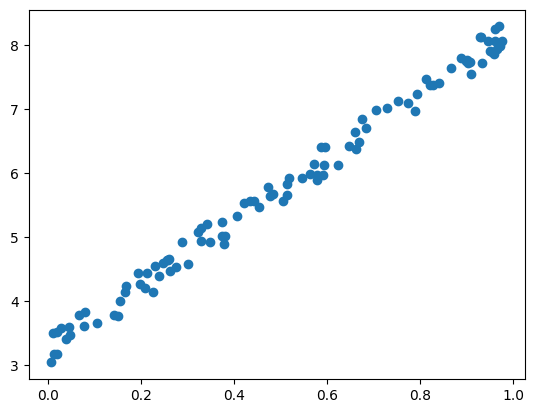

In [9]:
# 散点图
tempxList = list()
tempyList = list()
for i in range(100):
    x, y = getXyData()
    tempxList.append(x)
    tempyList.append(y)
plt.scatter(tempxList, tempyList)
plt.show()

# c. 定义数据集加载器

In [10]:
loader = Data.DataLoader(dataset=dataset,
                         batch_size=16,
                         shuffle=True,
                         drop_last=True)
len(loader), next(iter(loader))

(31,
 [tensor([[0.1007],
          [0.9448],
          [0.0309],
          [0.4248],
          [0.7447],
          [0.9478],
          [0.2728],
          [0.4392],
          [0.9131],
          [0.2058],
          [0.4083],
          [0.7482],
          [0.5077],
          [0.9232],
          [0.0204],
          [0.0581]]),
  tensor([[3.7932],
          [7.8086],
          [3.4213],
          [5.3226],
          [7.1263],
          [8.1563],
          [4.5699],
          [5.4213],
          [7.9378],
          [4.3343],
          [5.2524],
          [7.1902],
          [5.8548],
          [7.8431],
          [3.3692],
          [3.7648]])])

# 2. 创建模型

In [11]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(in_features=1, out_features=16),
            nn.ReLU(),
            nn.Linear(in_features=16, out_features=32),
            nn.ReLU(),
            nn.Linear(in_features=32, out_features=1)
        )

    def forward(self, x):
        return self.fc(x)

In [18]:
model = Model().to(device)

In [19]:
model

Model(
  (fc): Sequential(
    (0): Linear(in_features=1, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=1, bias=True)
  )
)

# 3. 训练

In [20]:
epochList = list()
lossList = list()
def train():
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
    loss_fun = nn.MSELoss()
    model.train()
    for epoch in range(200):
        for x, y in loader:
            out = model(x.to(device))
            loss = loss_fun(out.to("cpu"), y)
            epochList.append(epoch)
            lossList.append(loss.detach().numpy())
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        if epoch % 5 == 0:
            print(f"epoch:{epoch}, 损失：{loss.item()}")
    torch.save(model, "./5.单变量线性回归.model")

In [21]:
train()

epoch:0, 损失：35.460262298583984
epoch:5, 损失：28.308439254760742
epoch:10, 损失：24.201873779296875
epoch:15, 损失：22.634443283081055
epoch:20, 损失：14.888924598693848
epoch:25, 损失：12.847524642944336
epoch:30, 损失：6.113092422485352
epoch:35, 损失：4.013521194458008
epoch:40, 损失：1.9975181818008423
epoch:45, 损失：1.1373584270477295
epoch:50, 损失：0.48265472054481506
epoch:55, 损失：0.3234071135520935
epoch:60, 损失：0.20264479517936707
epoch:65, 损失：0.2600612938404083
epoch:70, 损失：0.2610841691493988
epoch:75, 损失：0.17747989296913147
epoch:80, 损失：0.09916654229164124
epoch:85, 损失：0.16654327511787415
epoch:90, 损失：0.10950113087892532
epoch:95, 损失：0.09289117157459259
epoch:100, 损失：0.10469401627779007
epoch:105, 损失：0.05439991131424904
epoch:110, 损失：0.10391433537006378
epoch:115, 损失：0.05853307992219925
epoch:120, 损失：0.036682695150375366
epoch:125, 损失：0.039679981768131256
epoch:130, 损失：0.03340550884604454
epoch:135, 损失：0.02362685650587082
epoch:140, 损失：0.02654605731368065
epoch:145, 损失：0.030627897009253502
epoch:150, 损失：

# 4. 测试

In [22]:
@torch.no_grad()
def test():
    model = torch.load("./5.单变量线性回归.model").to("cpu")
    model.eval()
    xData, yData = next(iter(loader))
    out = model(xData)
    return xData, yData, out

In [23]:
xData, yData, y_predict = test()

In [24]:
xData[0], yData[0], y_predict[0]

(tensor([0.3754]), tensor([5.3132]), tensor([5.1246]))

In [25]:
x1List = xData.numpy()
yPreList = y_predict.detach().numpy()

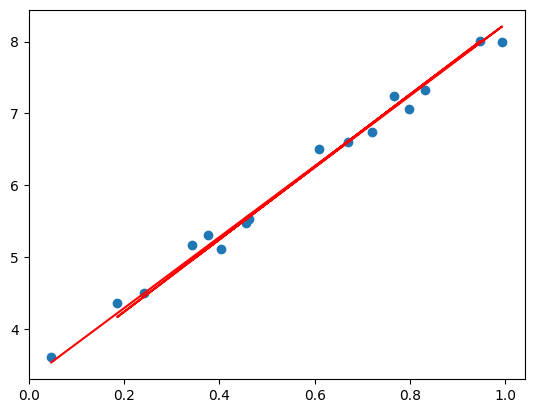

In [26]:
plt.scatter(x1List, yData)
plt.plot(x1List, yPreList, color="r")
plt.show()